## Setup

In [1]:
%pip install statsmodels pandas scipy matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import statsmodels.tsa as tsa

## Data Preprocessing

In [3]:
daily_sales = pd.read_csv('salesdaily.csv')

In [4]:
daily_sales.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [5]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datum         2106 non-null   object 
 1   M01AB         2106 non-null   float64
 2   M01AE         2106 non-null   float64
 3   N02BA         2106 non-null   float64
 4   N02BE         2106 non-null   float64
 5   N05B          2106 non-null   float64
 6   N05C          2106 non-null   float64
 7   R03           2106 non-null   float64
 8   R06           2106 non-null   float64
 9   Year          2106 non-null   int64  
 10  Month         2106 non-null   int64  
 11  Hour          2106 non-null   int64  
 12  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 214.0+ KB


In [6]:
# transform datum column into datetime using parser
daily_sales['datum'] = pd.to_datetime(daily_sales['datum'], format='%m/%d/%Y')

In [7]:
# drop columns Year	Month	Hour	Weekday Name
daily_sales.drop(['Year', 'Month', 'Hour', 'Weekday Name'], axis=1, inplace=True)

In [8]:
# rename datum column as date
daily_sales.rename(columns={'datum': 'date'}, inplace=True)

In [9]:
daily_sales.set_index('date', inplace=True)

In [10]:
daily_sales.info()
daily_sales.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M01AB   2106 non-null   float64
 1   M01AE   2106 non-null   float64
 2   N02BA   2106 non-null   float64
 3   N02BE   2106 non-null   float64
 4   N05B    2106 non-null   float64
 5   N05C    2106 non-null   float64
 6   R03     2106 non-null   float64
 7   R06     2106 non-null   float64
dtypes: float64(8)
memory usage: 148.1 KB


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
date,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0


In [11]:
# create new column "Total" with the sum of all values in a row
daily_sales['Total'] = daily_sales.sum(axis=1)

Text(0.5, 0, 'Date')

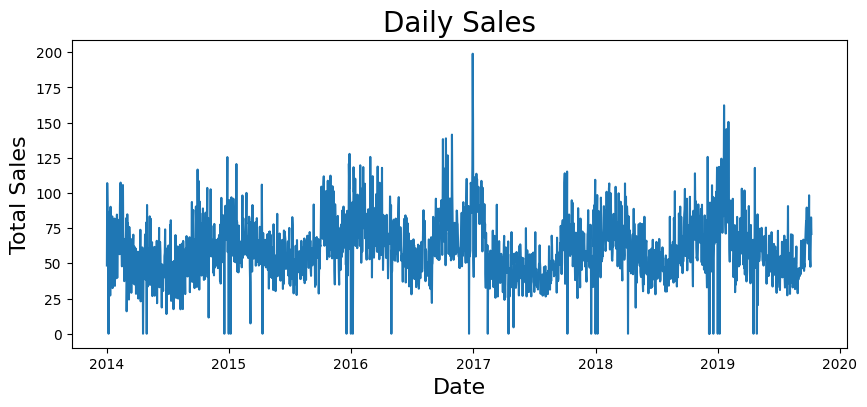

In [12]:
# plot the time series
plt.figure(figsize=(10,4))
plt.plot(daily_sales.index, daily_sales['Total'])
plt.title('Daily Sales', fontsize=20)
plt.ylabel('Total Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)

In [13]:
# create new dataframe with the cumulative values of each column grouped by month
weekly_sales = daily_sales.resample('W').sum()
weekly_sales.info()
weekly_sales.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302 entries, 2014-01-05 to 2019-10-13
Freq: W-SUN
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M01AB   302 non-null    float64
 1   M01AE   302 non-null    float64
 2   N02BA   302 non-null    float64
 3   N02BE   302 non-null    float64
 4   N05B    302 non-null    float64
 5   N05C    302 non-null    float64
 6   R03     302 non-null    float64
 7   R06     302 non-null    float64
 8   Total   302 non-null    float64
dtypes: float64(9)
memory usage: 23.6 KB


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Total
date,,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0,312.92
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2,391.81
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0,450.31
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0,398.47
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0,371.95


In [14]:
# drop last row in weekly_sales
weekly_sales = weekly_sales[:-1]

In [15]:
# add columns with the week number and the year from datetimeIndex index
weekly_sales['Week'] = weekly_sales.index.to_series().dt.isocalendar().week
weekly_sales['Year'] = weekly_sales.index.to_series().dt.isocalendar().year

In [16]:
weekly_sales.head()


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Total,Week,Year
date,,,,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0,312.92,1,2014
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2,391.81,2,2014
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0,450.31,3,2014
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0,398.47,4,2014
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0,371.95,5,2014


Text(0, 0.5, 'Sales')

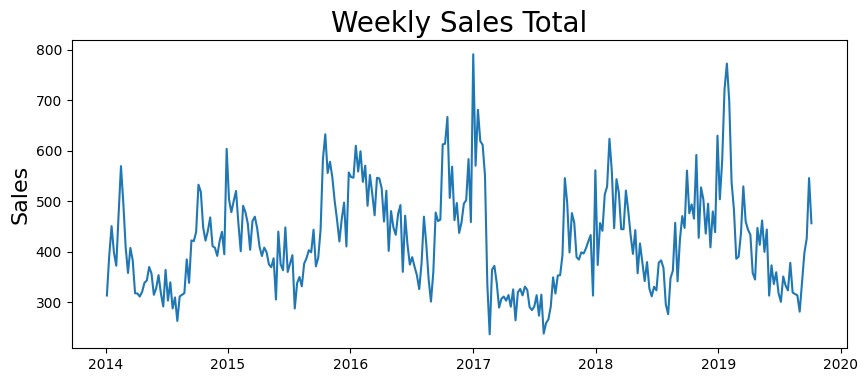

In [17]:
plt.figure(figsize=(10,4))
plt.plot(weekly_sales.index, weekly_sales['Total'])
plt.title('Weekly Sales Total', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [18]:
# store the Weekly sales in a csv file
weekly_sales.to_csv('weekly_sales.csv')

Text(0, 0.5, 'Sales')

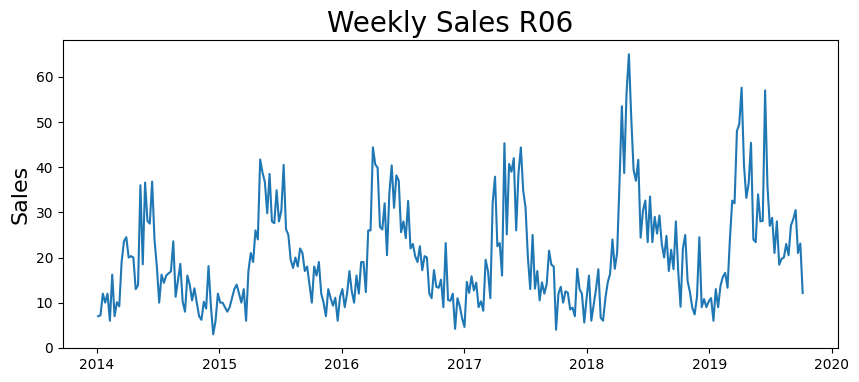

In [19]:
plt.figure(figsize=(10,4))
plt.plot(weekly_sales.index, weekly_sales['R06'])
plt.title('Weekly Sales R06', fontsize=20)
plt.ylabel('Sales', fontsize=16)

<Axes: xlabel='Week', ylabel='Total'>

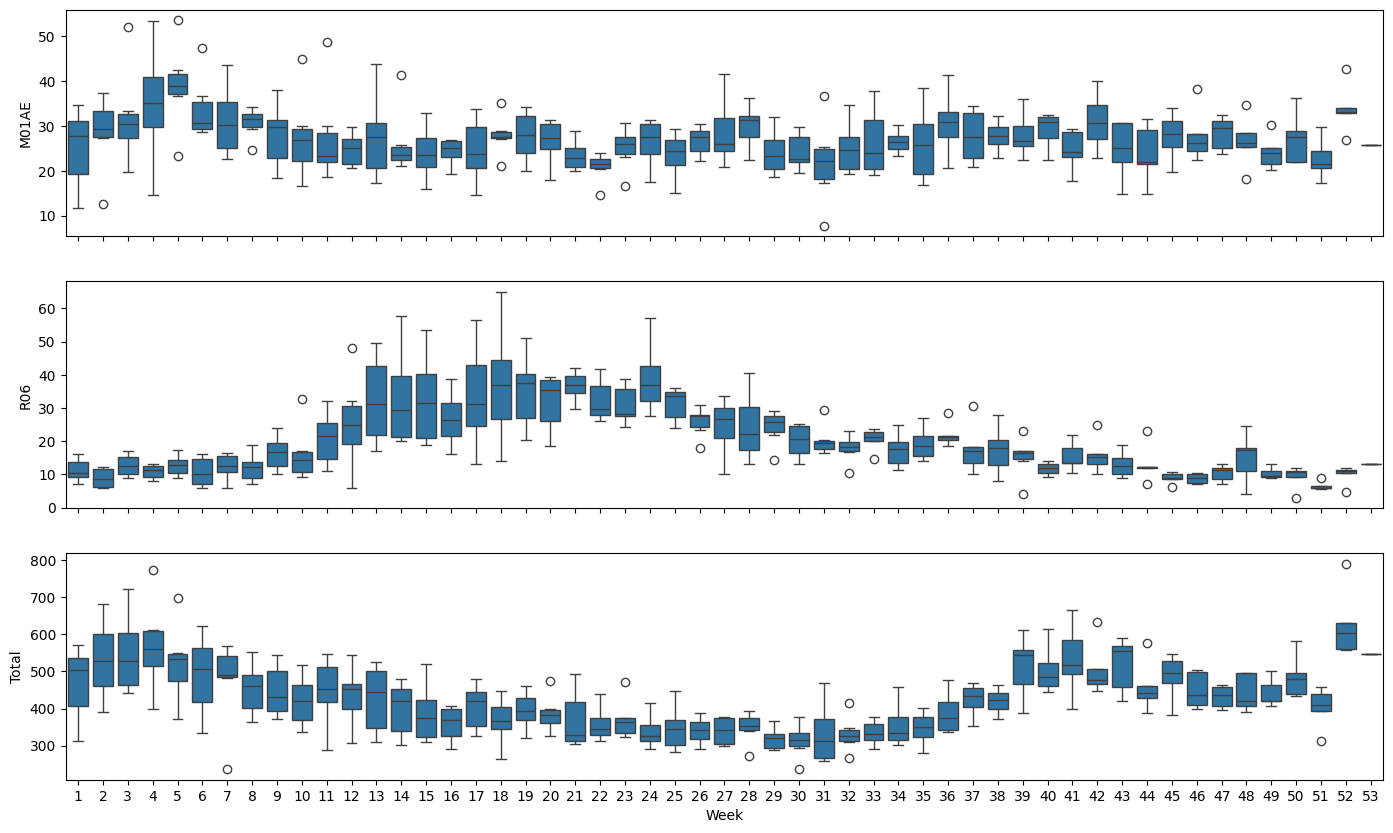

In [20]:
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(17, 10), sharex=True)

sns.boxplot(data=weekly_sales, x='Week', y='M01AE', ax=axes[0])
sns.boxplot(data=weekly_sales, x='Week', y='R06', ax=axes[1])
sns.boxplot(data=weekly_sales, x='Week', y='Total', ax=axes[2])

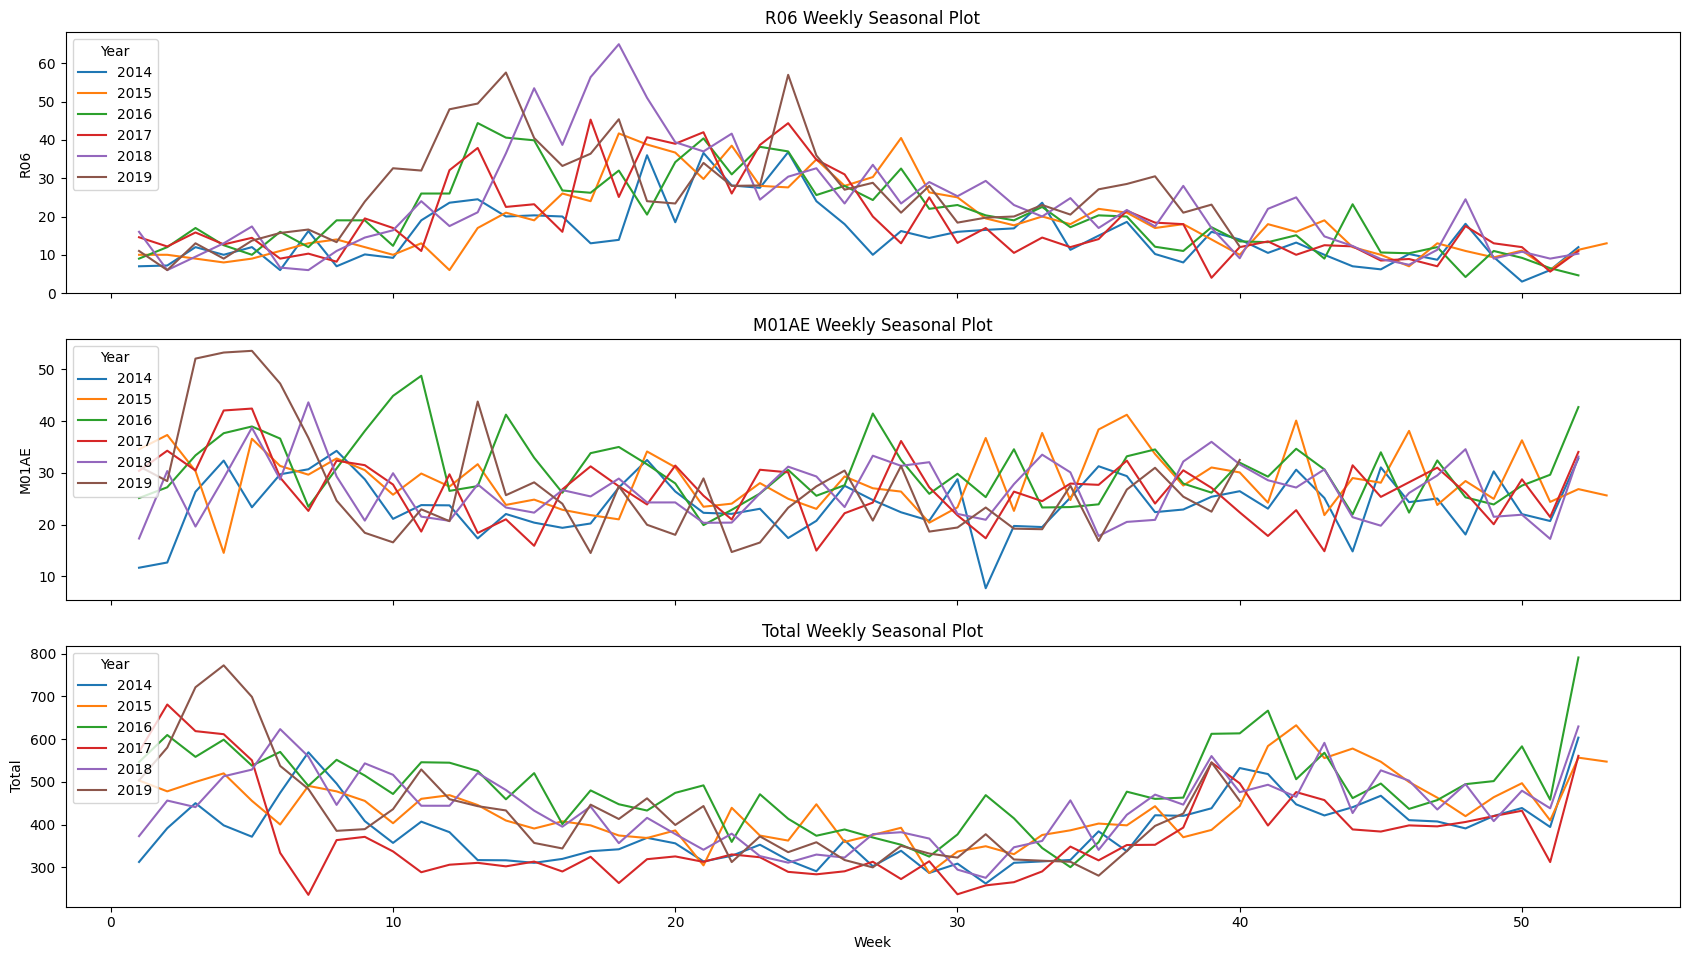

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(17, 10), sharex=True)

# Plotting each subplot
sns.lineplot(data=weekly_sales, x="Week", y="R06", hue="Year", palette="tab10", ax=axes[0])
axes[0].set_title("R06 Weekly Seasonal Plot")
axes[0].legend(title="Year", loc='upper left')

sns.lineplot(data=weekly_sales, x="Week", y="M01AE", hue="Year", palette="tab10", ax=axes[1])
axes[1].set_title("M01AE Weekly Seasonal Plot")
axes[1].legend(title="Year", loc='upper left')

sns.lineplot(data=weekly_sales, x="Week", y="Total", hue="Year", palette="tab10", ax=axes[2])
axes[2].set_title("Total Weekly Seasonal Plot")
axes[2].legend(title="Year", loc='upper left')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the suptitle

# Display the plot
plt.show()

Text(0, 0.5, 'Sales')

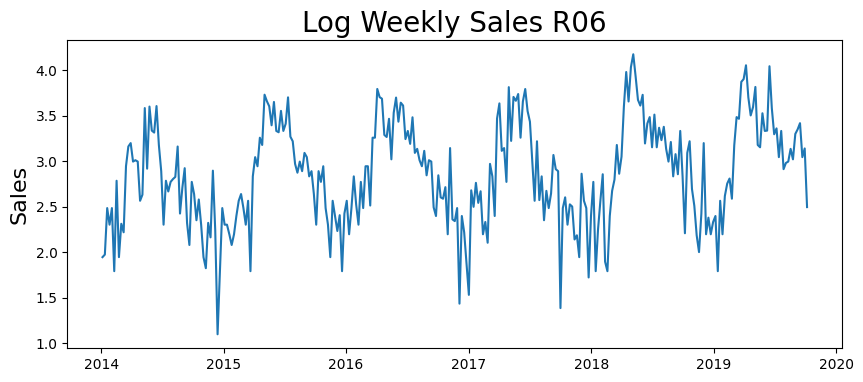

In [22]:
# log transformed weekly sales
R06_log = np.log(weekly_sales['R06'])

plt.figure(figsize=(10,4))
plt.plot(weekly_sales.index, R06_log)
plt.title('Log Weekly Sales R06', fontsize=20)
plt.ylabel('Sales', fontsize=16)

Text(0, 0.5, 'Sales')

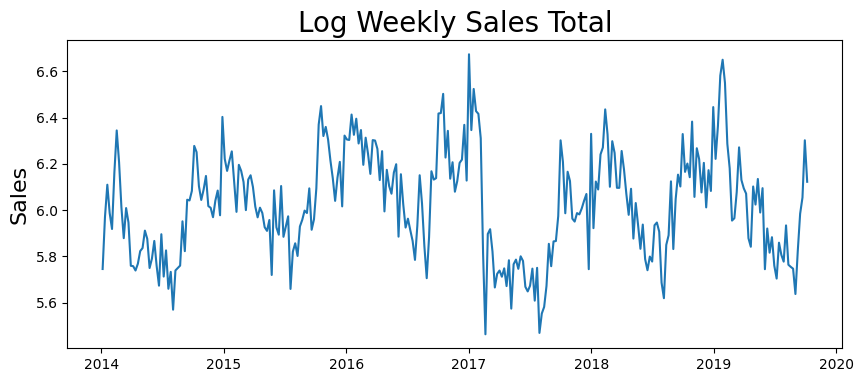

In [23]:
total_log = np.log(weekly_sales['Total'])

plt.figure(figsize=(10,4))
plt.plot(weekly_sales.index, total_log)
plt.title('Log Weekly Sales Total', fontsize=20)
plt.ylabel('Sales', fontsize=16)

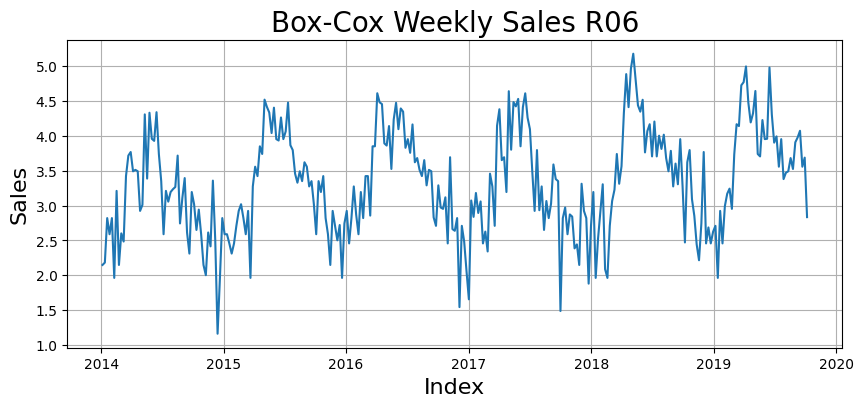

In [24]:
# boxcox transformation of the weekly sales

from scipy.stats import boxcox

# Apply Box-Cox transformation
R06_boxcox, lambda_R06 = boxcox(weekly_sales['R06'])
total_boxcox, lambda_total = boxcox(weekly_sales['Total'])

plt.figure(figsize=(10, 4))
plt.plot(weekly_sales.index, R06_boxcox)
plt.title('Box-Cox Weekly Sales R06', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Index', fontsize=16)
plt.grid(True)
plt.show()

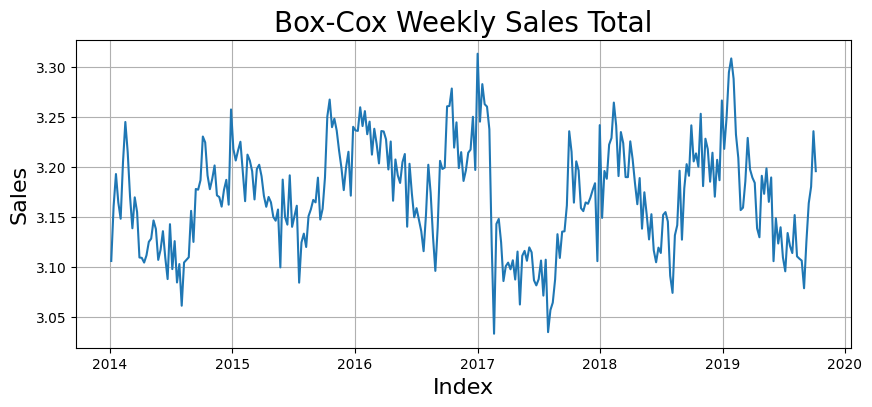

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(weekly_sales.index, total_boxcox)
plt.title('Box-Cox Weekly Sales Total', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Index', fontsize=16)
plt.grid(True)
plt.show()

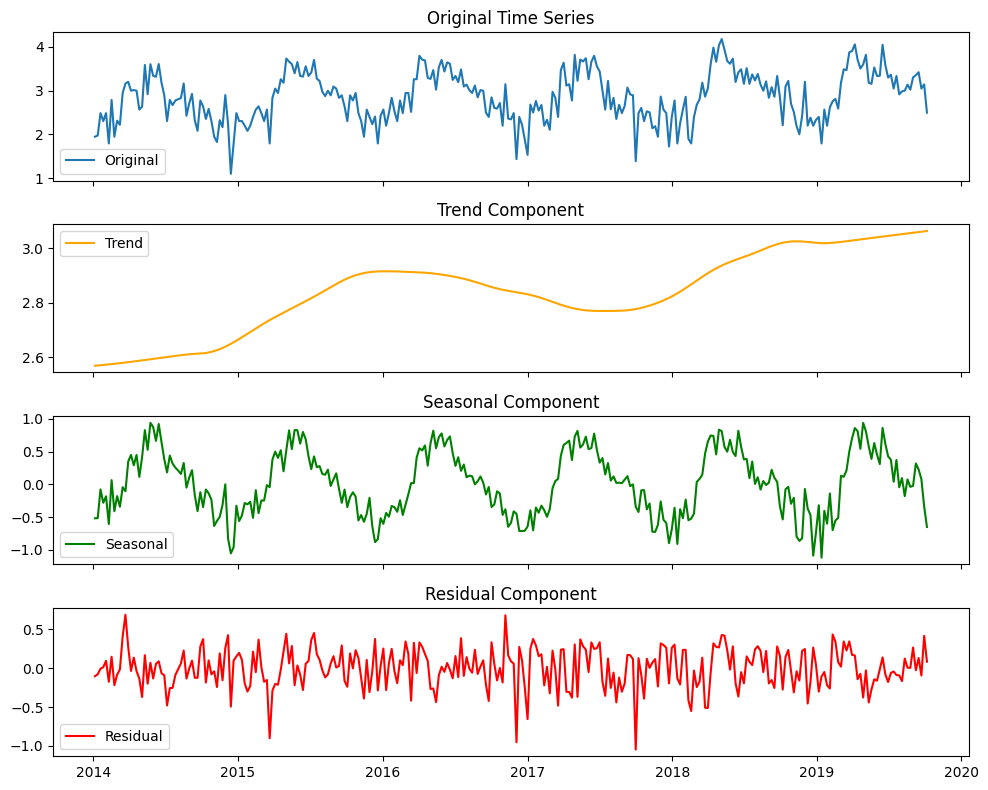

In [26]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

stl = STL(R06_log, seasonal=53)  # Adjust the seasonal parameter based on the frequency of your data
stl_result = stl.fit()

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original time series
axes[0].plot(R06_log, label='Original')
axes[0].set_title("Original Time Series")
axes[0].legend()

# Trend component
axes[1].plot(stl_result.trend, label='Trend', color='orange')
axes[1].set_title("Trend Component")
axes[1].legend()

# Seasonal component
axes[2].plot(stl_result.seasonal, label='Seasonal', color='green')
axes[2].set_title("Seasonal Component")
axes[2].legend()

# Residual component
axes[3].plot(stl_result.resid, label='Residual', color='red')
axes[3].set_title("Residual Component")
axes[3].legend()

# Adjust layout
plt.tight_layout()
plt.show()


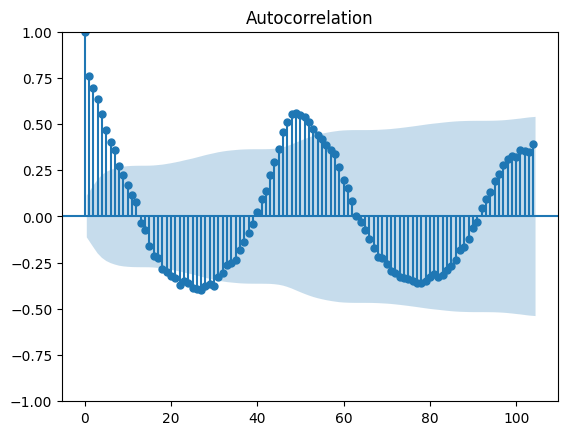

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(weekly_sales['R06'], lags=104)
plt.show()

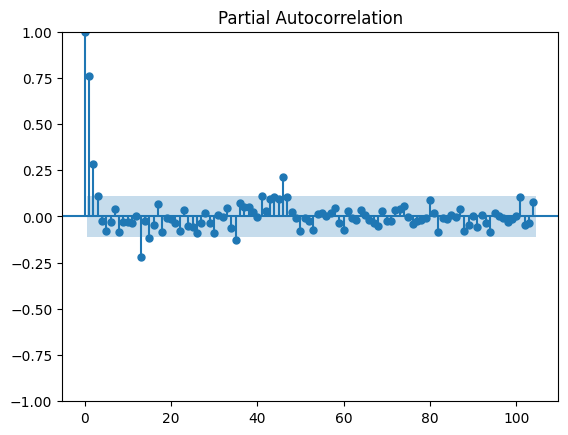

In [28]:
plot_pacf(weekly_sales['R06'], lags=104)
plt.show()

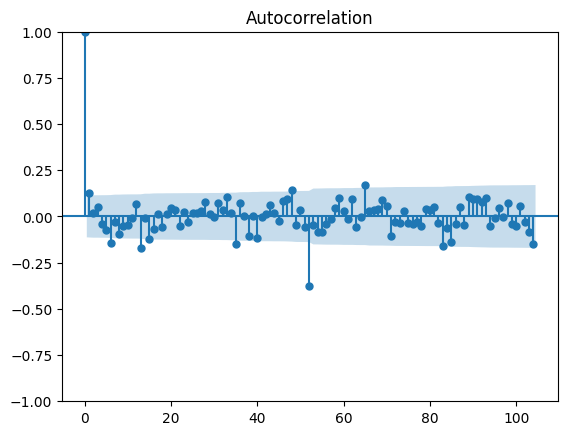

In [29]:
plot_acf(stl_result.resid, lags=104)
plt.show()

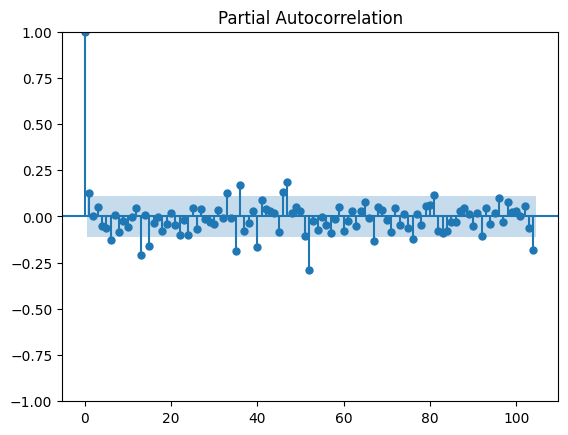

In [30]:
plot_pacf(stl_result.resid, lags=104)
plt.show()

## ADF Test

**Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

source: https://machinelearningmastery.com/time-series-data-stationary-python/

In [31]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test

adf_result, p_value, _, _, critical_values, _ = adfuller(R06_log)
print('ADF Statistic: %f' % adf_result)
print('p-value: %f' % p_value)
print('Critical Values:')
for key, value in critical_values.items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.598574
p-value: 0.000001
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


The ADF value is lower than the critical values (and p-value < 0.05) so the differenced time series is stationary.

## KPSS Test

This test uses the following null and alternative hypothesis:

**Null Hypothesis (H0)**: The time series is trend stationary.

**Alternate Hypothesis (H1)**: The time series is not trend stationary.

If the p-value of the test is less than some significance level (e.g. α = .05) then we reject the null hypothesis and conclude that the time series is not trend stationary (opposite of ADF test).

source: https://www.statology.org/kpss-test-in-python/



In [32]:
from statsmodels.tsa.stattools import kpss

In [33]:
p_value = 1
num_diffs = 0
R06_diff2 = R06_log.copy()
while p_value > 0.05:
    num_diffs += 1
    R06_diff2 = R06_diff2.diff(1)
    R06_diff2.dropna(inplace=True)
    kpss_result, p_value, _, critical_values = kpss(R06_diff2)
    
print("number of diffs: ", num_diffs)
print('KPSS Statistic: %f' % kpss_result)

number of diffs:  295
KPSS Statistic: 0.466112


C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2520914959.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result, p_value, _, critical_values = kpss(R06_diff2)
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2520914959.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result, p_value, _, critical_values = kpss(R06_diff2)
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2520914959.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result, p_value, _, critical_values = kpss(R06_diff2)
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2520914959.py:8: InterpolationWarning: The test statistic is outside 

---

## Data Splitting

In [34]:
# split time series into test and train
train = R06_log[:-12]
test = R06_log[-12:]

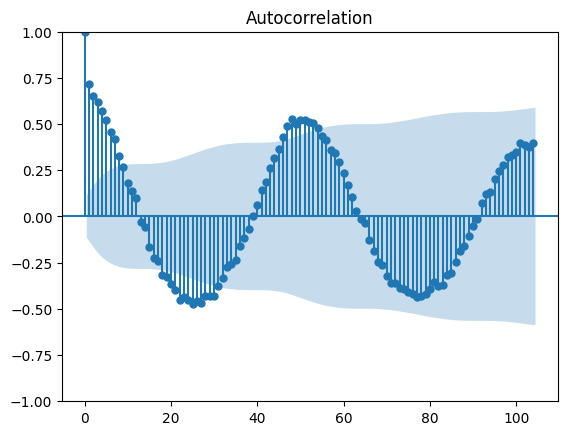

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(train, lags=104)
plt.show()

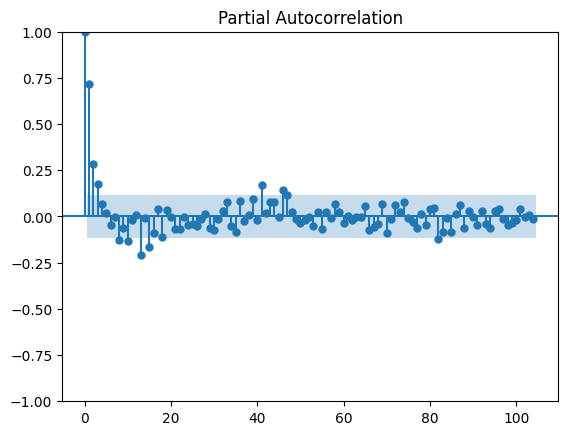

In [36]:
plot_pacf(train, lags=104)
plt.show()

## Modelling

### AR(3)

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_components = (3,0,0)

model = SARIMAX(train, order=arima_components)

fitted_model = model.fit()

In [38]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    R06   No. Observations:                  289
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -132.631
Date:                Fri, 03 Jan 2025   AIC                            273.261
Time:                        00:20:25   BIC                            287.927
Sample:                    01-05-2014   HQIC                           279.138
                         - 07-14-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5113      0.057      8.993      0.000       0.400       0.623
ar.L2          0.2487      0.061      4.048      0.000       0.128       0.369
ar.L3          0.2345      0.058      4.011      0.000       0.120       0.349
sigma2         0.1445      0.010     13.923      0.000       0.124       0.165
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 9.10
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.17   Skew:                            -0.21
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

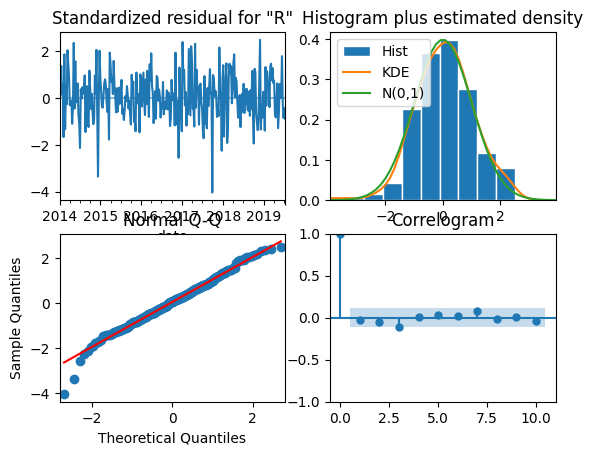

In [39]:
fitted_model.plot_diagnostics()
plt.show()

## 4.1

In [40]:
predictions = fitted_model.forecast(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test - predictions

Text(0.5, 0, 'Year')

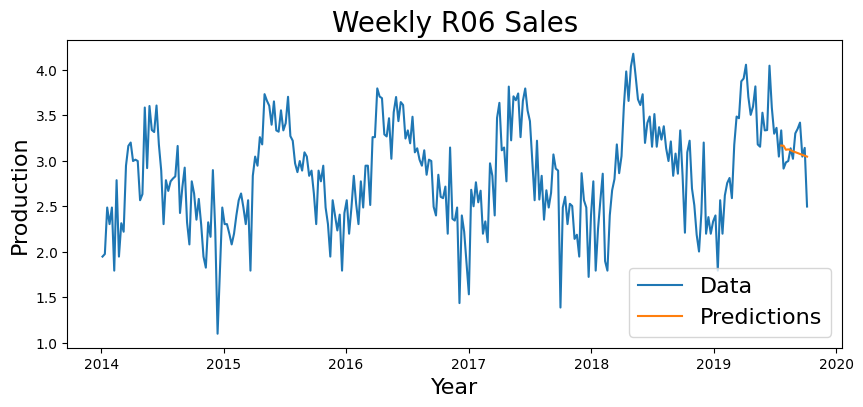

In [41]:
plt.figure(figsize=(10,4))

plt.plot(R06_log)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Weekly R06 Sales', fontsize=20)
plt.ylabel('Production', fontsize=16)
plt.xlabel('Year', fontsize=16)

## 4.2

In [42]:
# rolling train-test split for one year
train = R06_log[:-52]
test = R06_log[-52:]

rolling_predictions = test.copy()
for train_end in test.index:
    train_data = R06_log[:train_end-timedelta(days=1)]
    #print(train_data)
    model = SARIMAX(train_data, order=arima_components)
    model_fit = model.fit()

    # get last fitted value
    last_fitted_value = model_fit.fittedvalues.iloc[-1]
    
    # Store the prediction
    rolling_predictions[train_end] = last_fitted_value
    
rolling_residuals = test - rolling_predictions

Text(0.5, 0, 'Year')

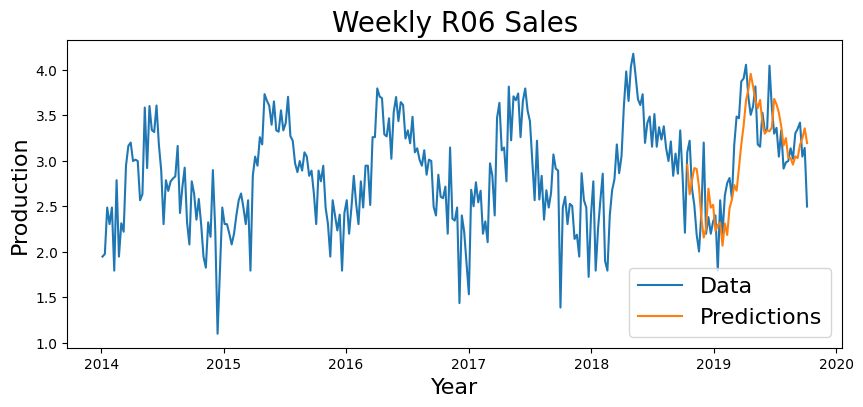

In [43]:
plt.figure(figsize=(10,4))

plt.plot(R06_log)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Weekly R06 Sales', fontsize=20)
plt.ylabel('Production', fontsize=16)
plt.xlabel('Year', fontsize=16)

In [44]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Mean Absolute Percent Error: 0.1116
Root Mean Squared Error: 0.40435957816254114


## 4.3

In [45]:
# rolling train-test split for one year
train = R06_log[:-52]
test = R06_log[-52:]

rolling_predictions = test.copy()
for train_end in test.index:
    train_data = R06_log[:train_end-timedelta(days=1)]
    #print(train_data)
    model = SARIMAX(train_data, order=arima_components)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
    
rolling_residuals = test - rolling_predictions

C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\1139139276.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\1139139276.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\1139139276.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\1139139276.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred


Text(0.5, 0, 'Year')

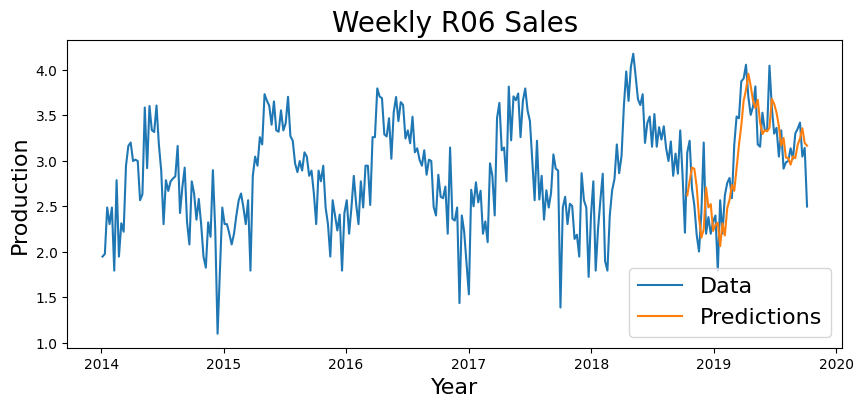

In [46]:
plt.figure(figsize=(10,4))

plt.plot(R06_log)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Weekly R06 Sales', fontsize=20)
plt.ylabel('Production', fontsize=16)
plt.xlabel('Year', fontsize=16)

In [47]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Mean Absolute Percent Error: 0.1027
Root Mean Squared Error: 0.3546186642638928


## 4.4

In [48]:
# rolling train-test split for one year
train = R06_log[:-52]
test = R06_log[-52:]

rolling_predictions = test.copy()
train_starting_week = train.index[0]
for i, train_end in enumerate(test.index):    
    train_data = R06_log[train_starting_week+timedelta(days=7*i):train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=arima_components)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred
    
rolling_residuals = test - rolling_predictions

C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2600165378.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2600165378.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2600165378.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
C:\Users\Athos\AppData\Local\Temp\ipykernel_9692\2600165378.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred


Text(0.5, 0, 'Year')

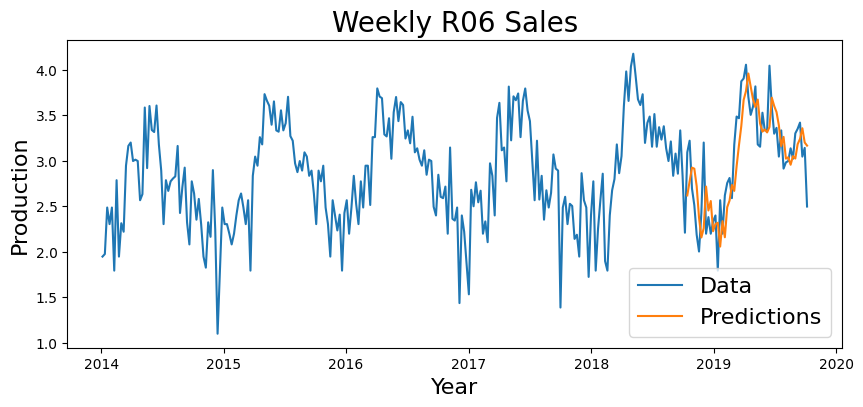

In [49]:
plt.figure(figsize=(10,4))

plt.plot(R06_log)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Weekly R06 Sales', fontsize=20)
plt.ylabel('Production', fontsize=16)
plt.xlabel('Year', fontsize=16)

In [50]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Mean Absolute Percent Error: 0.1031
Root Mean Squared Error: 0.3545877021875762
